This notebook will apply the PCA method to the music features data and then conduct the following clustering methods: 
1. k-means
2. hierarchical


In [50]:
import pandas as pd 
import matplotlib
import numpy as np
import seaborn as sb
import sklearn
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as sch
import os

In [51]:
#Read music feature data into python
file_name = 'music_features.csv'
music_features = pd.read_csv(file_name, index_col=0)

In [52]:
music_features.head()

acousticness  danceability  duration_ms  energy  \
160541         0.131         0.748     188491.0   0.627   
45268          0.684         0.509     187119.0   0.803   
236479         0.105         0.772     167866.0   0.635   
218937         0.145         0.807     188395.0   0.552   
193090         0.159         0.683     180933.0   0.676   

                            id  instrumentalness  key  liveness  loudness  \
160541  000xQL6tZNLJzIrtIgxqSl          0.000000  7.0    0.0852    -6.029   
45268   000xYdQfIZ4pDmBGzQalKU          0.000539  0.0    0.4630    -6.743   
236479  001b8t3bYPfnabpjpfG1Y4          0.000000  9.0    0.1170    -4.846   
218937  001cKCt7jEOzXjqgkn9DQf          0.000000  8.0    0.0999    -8.966   
193090  003F0rm5lqxcmhvJPKgfaJ          0.000000  1.0    0.0726    -6.688   

        mode  speechiness    tempo  time_signature            type  valence  
160541   1.0       0.0639  120.963             4.0  audio_features    0.524  
45268    1.0       0.0400  166.018             4.0  audio_features    0.651  
236479   1.0       0.3720   95.951             4.0  audio_features    0.541  
218937   1.0       0.3050  119.988             4.0  audio_features    0.287  
193090   0.0       0.1470   98.992             4.0  audio_features    0.434

In [53]:
music_features = music_features.drop(columns=['type'])

In [54]:
music_features.nunique()

acousticness         3599
danceability          889
duration_ms         49403
energy               1220
id                  88126
instrumentalness     5142
key                    12
liveness             1669
loudness            13366
mode                    2
speechiness          1473
tempo               37438
time_signature          5
valence              1470
dtype: int64

In [55]:
features = list(music_features)

In [56]:
features.remove('id')

<AxesSubplot:>

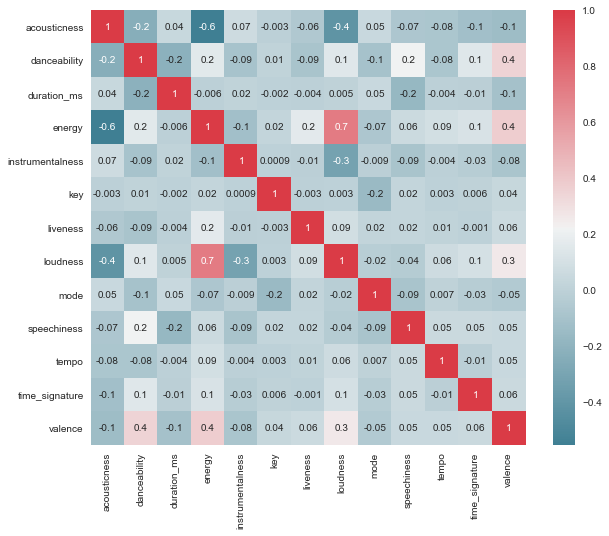

In [57]:
#Correlation

import matplotlib.pyplot as plt
import seaborn as sns

f, ax = plt.subplots(figsize=(10, 8))
corr = music_features.corr()
sns.heatmap(corr, cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax, annot=True, fmt=".1g")

#Energy may be removed


In [58]:
from sklearn.preprocessing import StandardScaler

feature_values = music_features.loc[:, features].values
normalized_values = StandardScaler().fit_transform(feature_values) # normalizing the features
np.mean(normalized_values),np.std(normalized_values)

(5.495111578731229e-17, 0.9999999999999998)

In [59]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.90)
principalComponents = pca.fit_transform(normalized_values)
principalDF = pd.DataFrame(data = principalComponents)

In [60]:
principalDF.head()

0         1         2         3         4         5         6  \
0 -0.451134 -0.033565 -0.439366  0.569575 -0.016130  0.316759  0.554029   
1  0.021821  1.748103 -1.119083 -2.078193  0.346411 -0.723661 -0.289637   
2 -1.080884 -1.439510 -0.394431  0.030598 -0.557967 -0.133521 -0.497757   
3  0.288048 -1.355919 -0.412265 -0.186526 -0.410735  0.724761 -0.627038   
4 -0.327189 -0.569155 -0.424199  0.695444  0.009849  0.219913 -0.097795   

          7         8         9  
0 -0.360533 -1.078593  0.110149  
1 -1.515539  0.975765 -1.260121  
2  0.253585 -1.397900  1.455529  
3  0.277819 -1.238071  1.280738  
4  1.509594  0.569051 -0.782480

## K Means Clustering

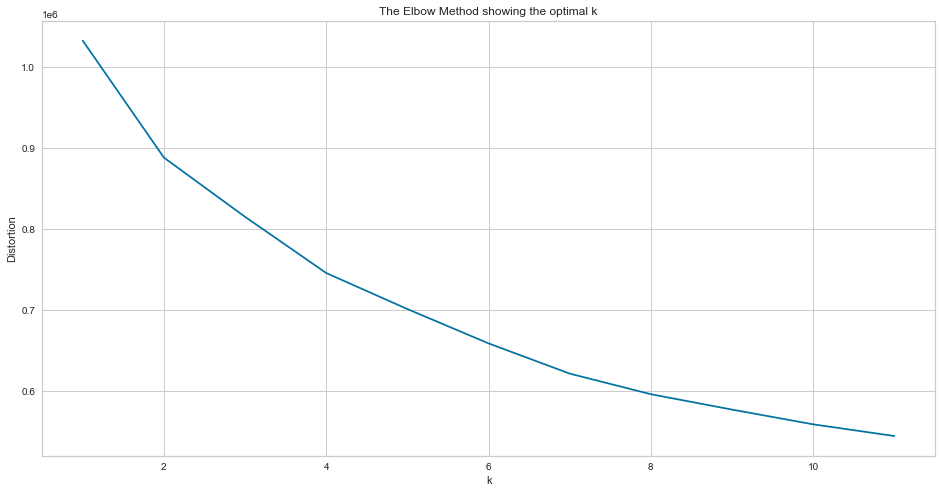

In [61]:
#Elbow method to select optimum number of clusters
import matplotlib.pyplot as plt
%matplotlib inline 
from sklearn.cluster import KMeans
from sklearn import datasets

distortions = []
K = range(1,12)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(principalDF)
    distortions.append(kmeanModel.inertia_)
    
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()



In [47]:
#Silhouette Method
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
   
for n_cluster in range(2, 11):
    kmeans = KMeans(n_clusters=n_cluster).fit(principalDF)
    label = kmeans.labels_
    sil_coeff = silhouette_score(principalDF, label, metric='euclidean')
    print("For n_clusters={}, The Silhouette Coefficient is {}".format(n_cluster, sil_coeff))

For n_clusters=2, The Silhouette Coefficient is 0.2982591850041283
For n_clusters=3, The Silhouette Coefficient is 0.1576298793346519
For n_clusters=4, The Silhouette Coefficient is 0.17428371909764775
For n_clusters=5, The Silhouette Coefficient is 0.16885272568754378
For n_clusters=6, The Silhouette Coefficient is 0.1759825583229785
For n_clusters=7, The Silhouette Coefficient is 0.16694914296321564
For n_clusters=8, The Silhouette Coefficient is 0.14780513648120105
For n_clusters=9, The Silhouette Coefficient is 0.1359962810430376
For n_clusters=10, The Silhouette Coefficient is 0.13451291146931987


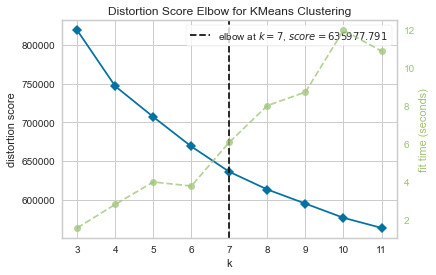

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [45]:
#Elbow method to select optimum number of clusters
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from yellowbrick.cluster import KElbowVisualizer


# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(3,12))

model_fit = visualizer.fit(principalDF)        # Fit the data to the visualizer
opt_elbow = model_fit.elbow_value_

visualizer.show()        # Finalize and render the figure


In [307]:
opt_clusters = 6
kmeanModel = KMeans(n_clusters=opt_clusters)
kmeanModel.fit(principalDF)
principalDF['k_means']=kmeanModel.predict(principalDF)
principalDF

0         1         2         3         4         5         6  \
0     -0.451134 -0.033565 -0.439366  0.569575 -0.016130  0.316759  0.554029   
1      0.021821  1.748103 -1.119083 -2.078193  0.346411 -0.723661 -0.289637   
2     -1.080884 -1.439510 -0.394431  0.030598 -0.557967 -0.133521 -0.497757   
3      0.288048 -1.355919 -0.412265 -0.186526 -0.410735  0.724761 -0.627038   
4     -0.327189 -0.569155 -0.424199  0.695444  0.009849  0.219913 -0.097795   
...         ...       ...       ...       ...       ...       ...       ...   
88121 -0.734547 -1.515364 -0.680875 -0.774179  0.536603 -0.787106 -0.401190   
88122  3.012498  1.240163 -0.657996  0.231045 -0.618575  0.655331 -0.252720   
88123 -0.468716  1.196099  0.247881  1.234980 -0.203270 -0.655778 -0.177416   
88124 -0.334650 -0.873805  1.696521 -0.303988 -0.126644 -0.362291 -0.138883   
88125 -1.484164 -0.712396  1.225641  1.246828  0.087447  0.252542  1.191610   

              7         8         9  k_means  
0     -0.360533 -1.078593  0.110149        5  
1     -1.515539  0.975765 -1.260121        5  
2      0.253585 -1.397900  1.455529        0  
3      0.277819 -1.238071  1.280738        0  
4      1.509594  0.569051 -0.782480        1  
...         ...       ...       ...      ...  
88121 -0.278696 -1.038216  0.716257        0  
88122 -0.745283  0.305702 -0.333657        2  
88123 -0.151268 -1.193836  0.511706        5  
88124 -0.912819  0.219202 -0.080859        1  
88125 -1.098495  1.200818  0.640776        1  

[88126 rows x 11 columns]

In [63]:
music_features.reset_index(inplace=True)
music_features['k_means'] = principalDF['k_means']
music_features

index  acousticness  danceability  duration_ms  energy  \
0      160541         0.131         0.748     188491.0   0.627   
1       45268         0.684         0.509     187119.0   0.803   
2      236479         0.105         0.772     167866.0   0.635   
3      218937         0.145         0.807     188395.0   0.552   
4      193090         0.159         0.683     180933.0   0.676   
...       ...           ...           ...          ...     ...   
88121  154441         0.036         0.850     136913.0   0.739   
88122  155996         0.728         0.423     260573.0   0.360   
88123  101624         0.200         0.637     241564.0   0.741   
88124  114871         0.353         0.819     208608.0   0.679   
88125  207130         0.187         0.939     279467.0   0.700   

                           id  instrumentalness   key  liveness  loudness  \
0      000xQL6tZNLJzIrtIgxqSl          0.000000   7.0    0.0852    -6.029   
1      000xYdQfIZ4pDmBGzQalKU          0.000539   0.0    0.4630    -6.743   
2      001b8t3bYPfnabpjpfG1Y4          0.000000   9.0    0.1170    -4.846   
3      001cKCt7jEOzXjqgkn9DQf          0.000000   8.0    0.0999    -8.966   
4      003F0rm5lqxcmhvJPKgfaJ          0.000000   1.0    0.0726    -6.688   
...                       ...               ...   ...       ...       ...   
88121  7zy0jQ2un779v9bmBrBVCV          0.000000   7.0    0.2890   -11.350   
88122  7zyYmIdjqqiX6kLryb7QBx          0.000000   3.0    0.1050    -9.458   
88123  7zyofXGhXgaqT8fhvLufdf          0.000000   9.0    0.1850    -4.364   
88124  7zzI3SbctTJN6wDerZNZCD          0.000000  11.0    0.2910    -8.984   
88125  7zzhknA0A39TH81meuX7WA          0.000000   9.0    0.0940    -6.526   

       mode  speechiness    tempo  time_signature  valence  k_means  
0       1.0       0.0639  120.963             4.0    0.524        1  
1       1.0       0.0400  166.018             4.0    0.651        1  
2       1.0       0.3720   95.951             4.0    0.541        2  
3       1.0       0.3050  119.988             4.0    0.287        2  
4       0.0       0.1470   98.992             4.0    0.434        4  
...     ...          ...      ...             ...      ...      ...  
88121   1.0       0.2290  112.063             4.0    0.602        2  
88122   1.0       0.0372  130.576             4.0    0.291        5  
88123   1.0       0.0300   89.982             4.0    0.419        1  
88124   0.0       0.1040  139.983             4.0    0.551        4  
88125   0.0       0.0519  132.004             4.0    0.886        4  

[88126 rows x 16 columns]

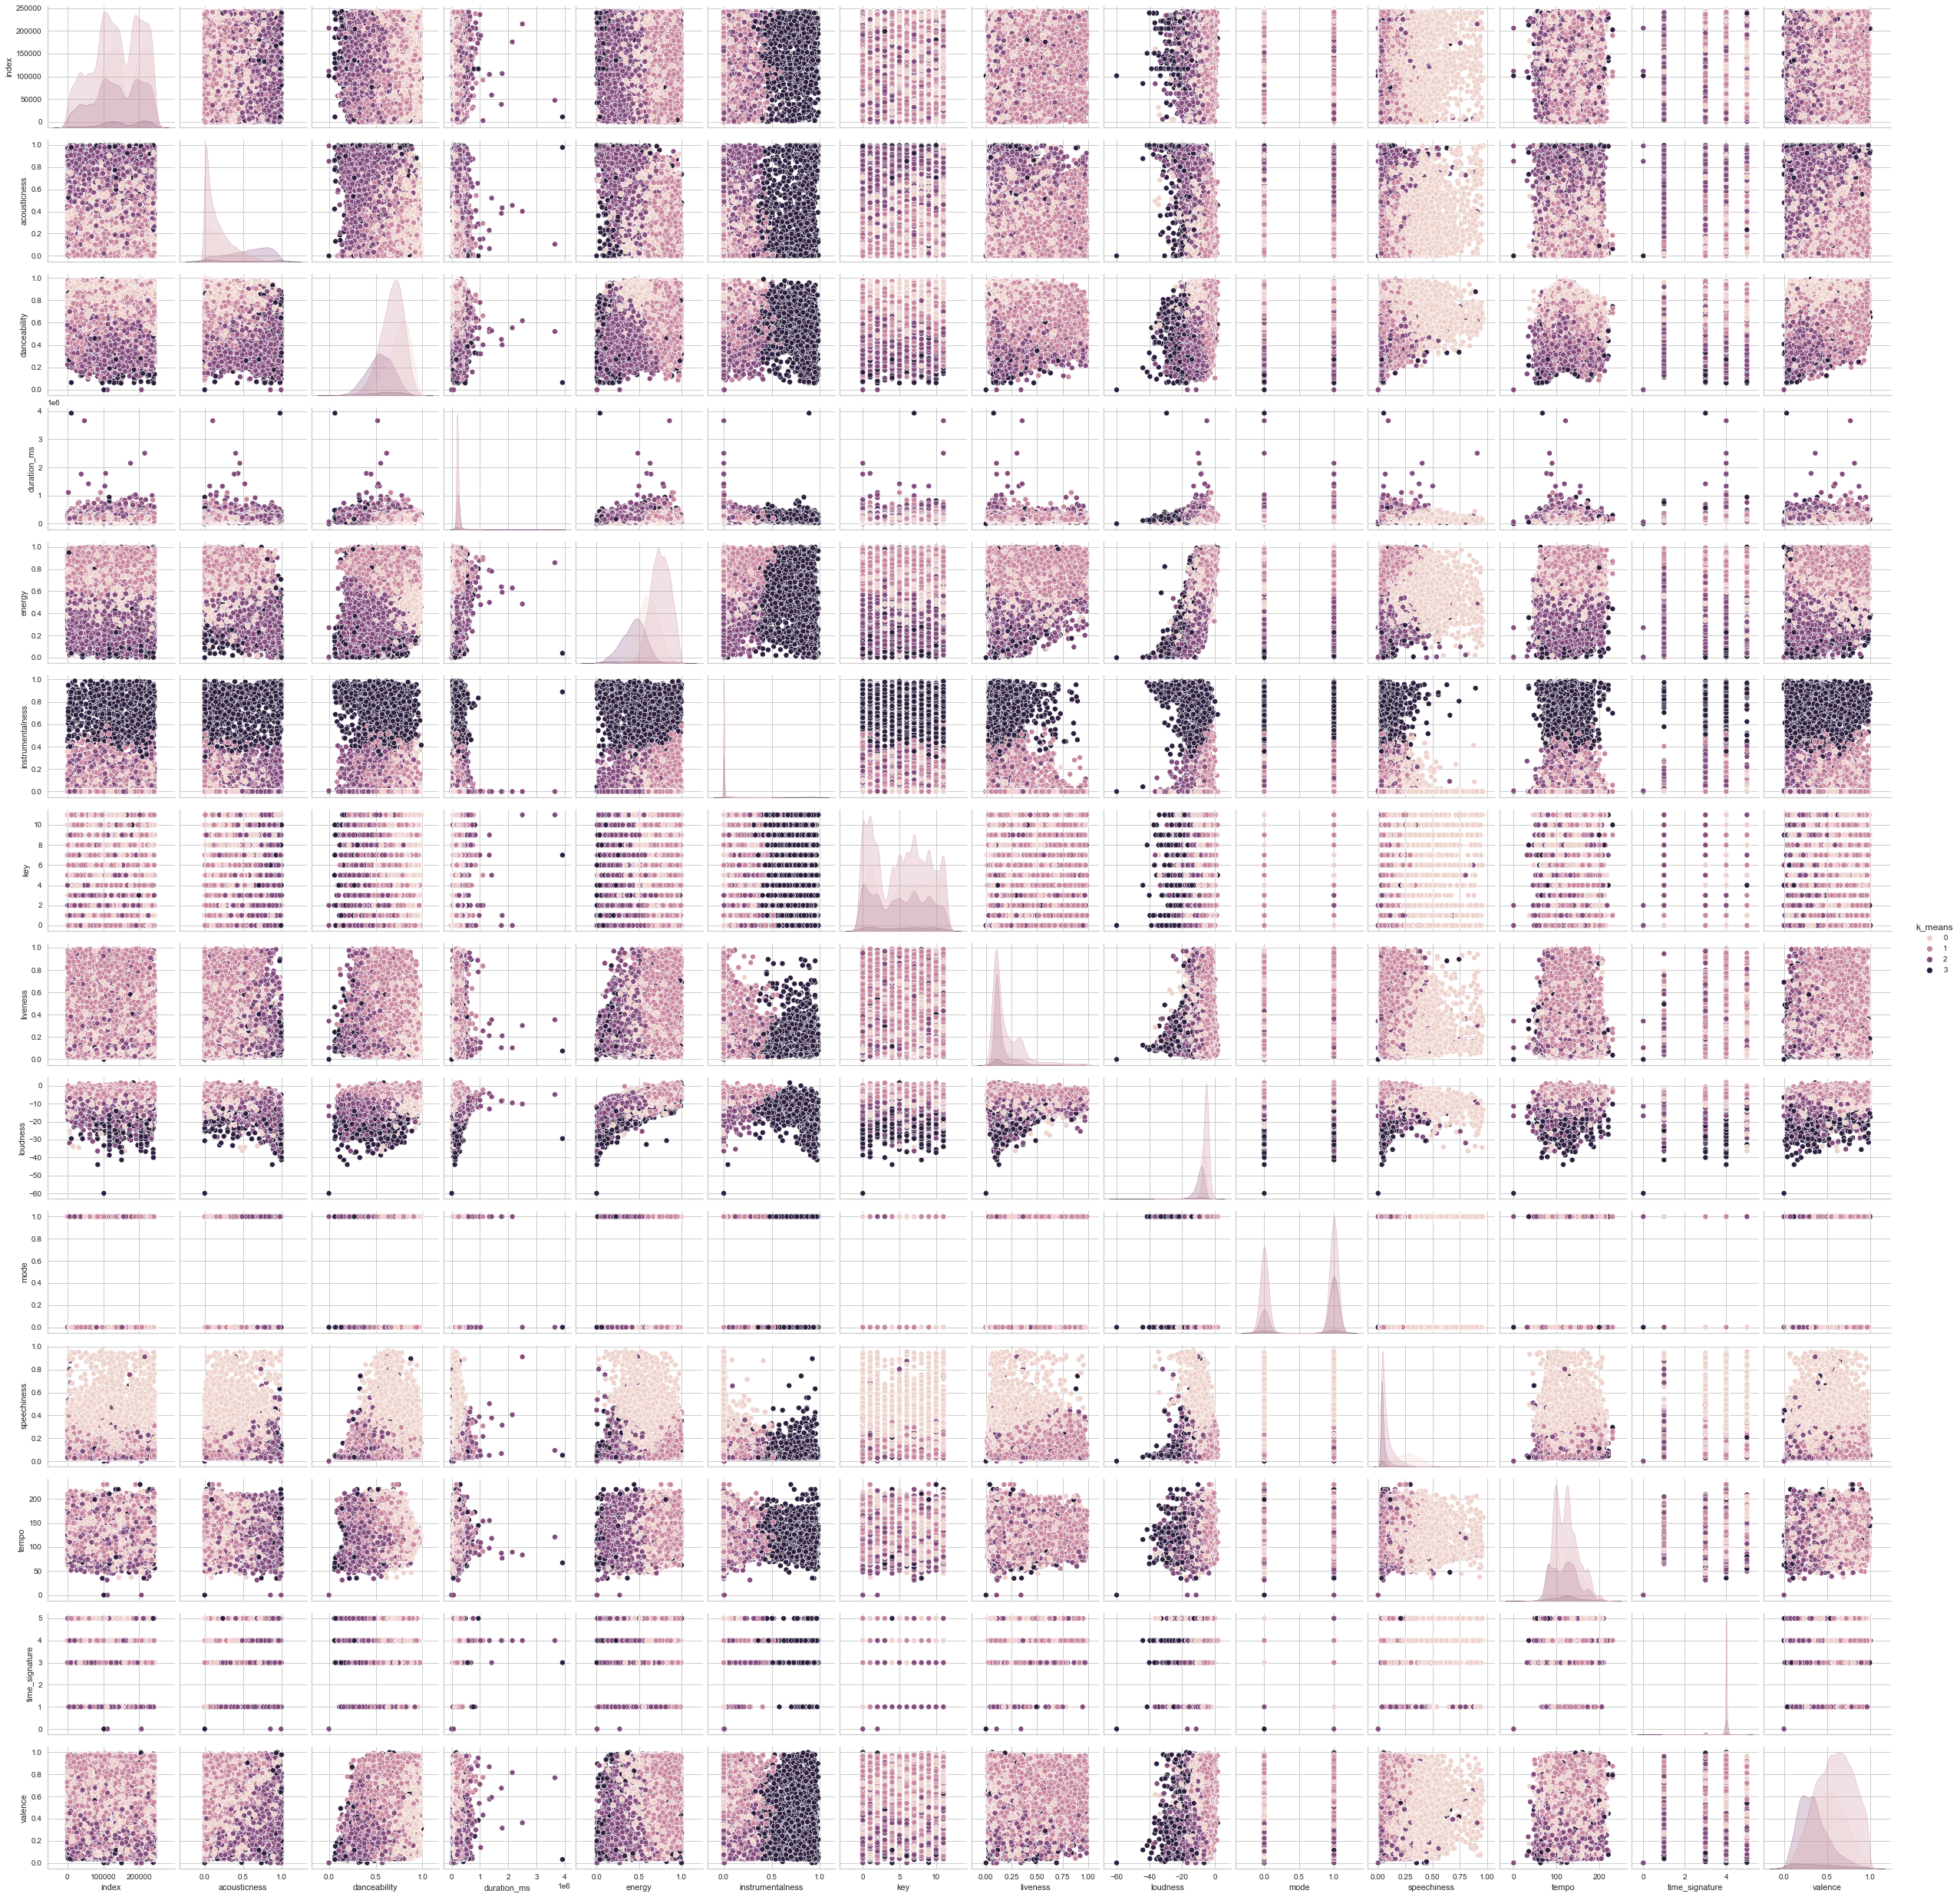

In [47]:
#Plotting clusters between variables pairs.
sns.pairplot(music_features, hue = 'k_means')

In [64]:
from sklearn.preprocessing import MinMaxScaler



scaled_df = music_features[['acousticness','danceability','energy','instrumentalness',"loudness",'liveness','speechiness','tempo','valence','key','mode']].copy()
scaler = MinMaxScaler() 
scaled_values = scaler.fit_transform(scaled_df) 
scaled_df.loc[:,:] = scaled_values
scaled_df['k_means'] = music_features["k_means"]
scaled_df

acousticness  danceability  energy  instrumentalness  loudness  \
0          0.131526      0.757085   0.627          0.000000  0.875328   
1          0.686747      0.515182   0.803          0.000546  0.863748   
2          0.105422      0.781377   0.635          0.000000  0.894515   
3          0.145582      0.816802   0.552          0.000000  0.827695   
4          0.159639      0.691296   0.676          0.000000  0.864640   
...             ...           ...     ...               ...       ...   
88121      0.036145      0.860324   0.739          0.000000  0.789030   
88122      0.730924      0.428138   0.360          0.000000  0.819715   
88123      0.200803      0.644737   0.741          0.000000  0.902332   
88124      0.354418      0.828947   0.679          0.000000  0.827403   
88125      0.187751      0.950405   0.700          0.000000  0.867268   

       liveness  speechiness     tempo   valence       key  mode  k_means  
0      0.086061     0.066149  0.525309  0.524525  0.636364   1.0        1  
1      0.467677     0.041408  0.720971  0.651652  0.000000   1.0        1  
2      0.118182     0.385093  0.416689  0.541542  0.818182   1.0        2  
3      0.100909     0.315735  0.521075  0.287287  0.727273   1.0        2  
4      0.073333     0.152174  0.429895  0.434434  0.090909   0.0        4  
...         ...          ...       ...       ...       ...   ...      ...  
88121  0.291919     0.237060  0.486659  0.602603  0.636364   1.0        2  
88122  0.106061     0.038509  0.567056  0.291291  0.272727   1.0        5  
88123  0.186869     0.031056  0.390767  0.419419  0.818182   1.0        1  
88124  0.293939     0.107660  0.607908  0.551552  1.000000   0.0        4  
88125  0.094949     0.053727  0.573257  0.886887  0.818182   0.0        4  

[88126 rows x 12 columns]

In [ ]:
scaled_df.to_excel("scaled_df.xlsx")

In [34]:
#Create excel with results
music_features.to_excel("music_features_clusters.xlsx")  

In [66]:
import plotly.graph_objects as go
from IPython.display import clear_output
import matplotlib.pyplot as plt

fig = go.Figure()

angles = list(scaled_df[['acousticness','danceability','energy','instrumentalness',"loudness",'liveness','speechiness','tempo','valence','key','mode']].columns)
angles.append(angles[0])
layoutdict = dict(
            radialaxis=dict(
            visible=True,
            range=[0, 1]
            ))
for i in range(opt_clusters):
    subset = scaled_df[scaled_df['k_means'] == i]
    data = [np.mean(subset[col]) for col in subset[['acousticness','danceability','energy','instrumentalness',"loudness",'liveness','speechiness','tempo','valence','key','mode']].columns]
    data.append(data[0])
    fig.add_trace(go.Scatterpolar(
        r=data,
        theta=angles,
        fill='toself',
        name="Cluster " + str(i)))
    
fig.update_layout(
        polar=layoutdict,
        showlegend=True,template='plotly_dark'
        )
fig.show()

In [67]:
scaled_df.groupby(["k_means"])["k_means"].count()

k_means
0     4100
1    27361
2    14176
3     1924
4    25964
5    14601
Name: k_means, dtype: int64

In [ ]:
dendrogram = sch.dendrogram(sch.linkage(principalDF.values, method  = "ward"))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

In [ ]:
from sklearn.cluster import AgglomerativeClustering 
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage ='ward')

## Country rankings

In [72]:
#Read music feature data into python
file_name = 'top_tracks.csv'
top_tracks = pd.read_csv(file_name)

In [75]:
top_tracks

Unnamed: 0  Position  \
0                 0         1   
1                 1         2   
2                 2         3   
3                 3         4   
4                 4         5   
...             ...       ...   
9928011     9928028       196   
9928012     9928029       197   
9928013     9928030       198   
9928014     9928031       199   
9928015     9928032       200   

                                                Track Name           Artist  \
0                               Reggaetón Lento (Bailemos)             CNCO   
1                                Otra vez (feat. J Balvin)    Zion & Lennox   
2                                  Chantaje (feat. Maluma)          Shakira   
3                              Vente Pa' Ca (feat. Maluma)     Ricky Martin   
4                                              Traicionera  Sebastian Yatra   
...                                                    ...              ...   
9928011                              Every Breath You Take       The Police   
9928012                                        you my baby     SHELOVESKAMO   
9928013                                           Fly Away      Tones And I   
9928014  Mr. Perfectly Fine (Taylor’s Version) (From Th...     Taylor Swift   
9928015                              What Other People Say      Sam Fischer   

         Streams                                                URL  \
0           6784  https://open.spotify.com/track/3AEZUABDXNtecAO...   
1           5748  https://open.spotify.com/track/3QwBODjSEzelZyV...   
2           5506  https://open.spotify.com/track/6mICuAdrwEjh6Y6...   
3           4804  https://open.spotify.com/track/7DM4BPaS7uofFul...   
4           4780  https://open.spotify.com/track/5J1c3M4EldCfNxX...   
...          ...                                                ...   
9928011     2953  https://open.spotify.com/track/1JSTJqkT5qHq8MD...   
9928012     2943  https://open.spotify.com/track/03xoNiEjS4FfKo5...   
9928013     2941  https://open.spotify.com/track/5ri4zqtWhG07hIu...   
9928014     2934  https://open.spotify.com/track/2CYVETnhM9aytqr...   
9928015     2919  https://open.spotify.com/track/2h9TDNEXRhcDIV3...   

               Date code          name                      id  
0        2017-01-01   bo       Bolivia  3AEZUABDXNtecAOSC1qTfo  
1        2017-01-01   bo       Bolivia  3QwBODjSEzelZyVjxPOHdq  
2        2017-01-01   bo       Bolivia  6mICuAdrwEjh6Y6lroV2Kg  
3        2017-01-01   bo       Bolivia  7DM4BPaS7uofFul3ywMe46  
4        2017-01-01   bo       Bolivia  5J1c3M4EldCfNxXwrwt8mT  
...             ...  ...           ...                     ...  
9928011  2021-04-16   za  South Africa  1JSTJqkT5qHq8MDJnJbRE1  
9928012  2021-04-16   za  South Africa  03xoNiEjS4FfKo5685cMyJ  
9928013  2021-04-16   za  South Africa  5ri4zqtWhG07hIuNNDWP76  
9928014  2021-04-16   za  South Africa  2CYVETnhM9aytqrazYYwrK  
9928015  2021-04-16   za  South Africa  2h9TDNEXRhcDIV3fsoEVq9  

[9928016 rows x 10 columns]

In [74]:
id_clusters_df = music_features[['id','k_means']].copy()
id_clusters_df

id  k_means
0      000xQL6tZNLJzIrtIgxqSl        1
1      000xYdQfIZ4pDmBGzQalKU        1
2      001b8t3bYPfnabpjpfG1Y4        2
3      001cKCt7jEOzXjqgkn9DQf        2
4      003F0rm5lqxcmhvJPKgfaJ        4
...                       ...      ...
88121  7zy0jQ2un779v9bmBrBVCV        2
88122  7zyYmIdjqqiX6kLryb7QBx        5
88123  7zyofXGhXgaqT8fhvLufdf        1
88124  7zzI3SbctTJN6wDerZNZCD        4
88125  7zzhknA0A39TH81meuX7WA        4

[88126 rows x 2 columns]

In [76]:
results = top_tracks.merge(id_clusters_df, on="id")
results

Unnamed: 0  Position                  Track Name             Artist  \
0                 0         1  Reggaetón Lento (Bailemos)               CNCO   
1               444         4  Reggaetón Lento (Bailemos)               CNCO   
2               730         7  Reggaetón Lento (Bailemos)               CNCO   
3              1582        38  Reggaetón Lento (Bailemos)               CNCO   
4              1791         1  Reggaetón Lento (Bailemos)               CNCO   
...             ...       ...                         ...                ...   
9927871     9927340       108            GO! (with BIG30)       Moneybagg Yo   
9927872     9927386       154    That Go! (feat. T-Shyne)  Young Stoner Life   
9927873     9927527        95                  Dejo Atrás    No Te Va Gustar   
9927874     9927745       113  Có Chàng Trai Viết Lên Cây    Phan Mạnh Quỳnh   
9927875     9927947       115            Vrystaat Vlaktes               Reën   

         Streams                                                URL  \
0           6784  https://open.spotify.com/track/3AEZUABDXNtecAO...   
1           5760  https://open.spotify.com/track/3AEZUABDXNtecAO...   
2           1846  https://open.spotify.com/track/3AEZUABDXNtecAO...   
3        1116627  https://open.spotify.com/track/3AEZUABDXNtecAO...   
4           8163  https://open.spotify.com/track/3AEZUABDXNtecAO...   
...          ...                                                ...   
9927871   304622  https://open.spotify.com/track/4VYKA63F2fcQnsv...   
9927872   247931  https://open.spotify.com/track/6rUmUJ2drFemHTH...   
9927873     3194  https://open.spotify.com/track/60FasBAOZzjNCSo...   
9927874     6132  https://open.spotify.com/track/2NEzxeMKW0mk5pr...   
9927875     3841  https://open.spotify.com/track/6DbTFMOQARs5TDz...   

               Date    code           name                      id  k_means  
0        2017-01-01      bo        Bolivia  3AEZUABDXNtecAOSC1qTfo        4  
1        2017-01-01      hn       Honduras  3AEZUABDXNtecAOSC1qTfo        4  
2        2017-01-01      ni      Nicaragua  3AEZUABDXNtecAOSC1qTfo        4  
3        2017-01-02  global         Global  3AEZUABDXNtecAOSC1qTfo        4  
4        2017-01-02      gt      Guatemala  3AEZUABDXNtecAOSC1qTfo        4  
...             ...     ...            ...                     ...      ...  
9927871  2021-04-16      us  United States  4VYKA63F2fcQnsvfWUpzn9        2  
9927872  2021-04-16      us  United States  6rUmUJ2drFemHTH73bFAKQ        1  
9927873  2021-04-16      uy        Uruguay  60FasBAOZzjNCSoljbbASM        1  
9927874  2021-04-16      vn       Viet Nam  2NEzxeMKW0mk5pr7tcrvs2        5  
9927875  2021-04-16      za   South Africa  6DbTFMOQARs5TDzKsMwYpn        1  

[9927876 rows x 11 columns]

In [77]:
results.groupby(by=["k_means"]).sum()

Unnamed: 0   Position       Streams
k_means                                         
0         1636966662793   32310033   15659663518
1        18381469846537  367060044  213043615300
2         5605427987957   96647090   71015709536
3          270418812157    4891218    2135924521
4        15657372286162  303602734  177574459643
5         7729898920999  154688602   70922648380

In [131]:
cluster_country_streams = results.groupby(['code', 'k_means']).agg({'Streams': ['sum'], 'Position': ['mean'], 'Position': ['min']})
cluster_country_streams

Streams Position
                    sum      min
code k_means                    
ae   0          3425461        2
     1         33009256        1
     2         13290117        1
     3           614424        2
     4         35363013        1
...                 ...      ...
za   1        108658921        1
     2         39446178        1
     3          6874458        2
     4         90026617        1
     5         54549380        1

[414 rows x 2 columns]

In [248]:
#Grouping by country
cluster_country = results.groupby(['name', 'k_means']).agg({'Streams': ['sum']})
cluster_country.columns = cluster_country.columns.droplevel(1)
cluster_country

Streams
name      k_means            
Argentina 0         169296112
          1        4002557972
          2         715240938
          3           3761651
          4        3350427411
...                       ...
Viet Nam  1         142595311
          2          34711199
          3           3593835
          4         162643972
          5         184922817

[414 rows x 1 columns]

In [249]:
#Grouping by country
cluster_country
cluster_country_pcts = cluster_country.groupby(level=0).apply(lambda x:
                                                 x / float(x.sum()))
cluster_country_pcts.reset_index(inplace = True)
cluster_country_pcts

#cluster_country_pcts.to_excel("cluster_country_pcts.xlsx")

name  k_means   Streams
0    Argentina        0  0.019439
1    Argentina        1  0.459574
2    Argentina        2  0.082124
3    Argentina        3  0.000432
4    Argentina        4  0.384696
..         ...      ...       ...
409   Viet Nam        1  0.255201
410   Viet Nam        2  0.062122
411   Viet Nam        3  0.006432
412   Viet Nam        4  0.291082
413   Viet Nam        5  0.330954

[414 rows x 3 columns]

In [274]:
#Grouping by cluster and country
cluster_country_cluster = results.groupby(['k_means','code']).agg({'Streams': ['sum']})
cluster_country_cluster

cluster_country_cluster_pcts = cluster_country_cluster.groupby(level=0).apply(lambda x:
                                                 x / float(x.sum()))
cluster_country_cluster_pcts.columns = cluster_country_cluster_pcts.columns.droplevel(1)

cluster_country_cluster_pcts.reset_index(inplace = True)
cluster_country_cluster_pcts

k_means code   Streams
0          0   ae  0.000219
1          0   ar  0.010811
2          0   at  0.001638
3          0   au  0.018018
4          0   be  0.003609
..       ...  ...       ...
409        5   ua  0.000133
410        5   us  0.135883
411        5   uy  0.000302
412        5   vn  0.002607
413        5   za  0.000769

[414 rows x 3 columns]

In [275]:
#Erase global
cluster_country_cluster_pcts = cluster_country_cluster_pcts[cluster_country_cluster_pcts.code != "global"]
cluster_country_cluster_pcts

k_means code   Streams
0          0   ae  0.000219
1          0   ar  0.010811
2          0   at  0.001638
3          0   au  0.018018
4          0   be  0.003609
..       ...  ...       ...
409        5   ua  0.000133
410        5   us  0.135883
411        5   uy  0.000302
412        5   vn  0.002607
413        5   za  0.000769

[408 rows x 3 columns]

In [276]:
#Adding iso3 country codes
import country_converter as coco
import plotly.express as px

iso2_codes = cluster_country_cluster_pcts['code']
cluster_country_cluster_pcts['country code'] = coco.convert(names=iso2_codes, to='ISO3')
# add country name by applying the convert method
cluster_country_cluster_pcts['country name'] = cluster_country_cluster_pcts.code.apply(lambda x: coco.convert(names=x, to='name_short', not_found=None))
cluster_country_cluster_pcts

<ipython-input-276-67c09c7252c3>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-276-67c09c7252c3>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



k_means code   Streams country code          country name
0          0   ae  0.000219          ARE  United Arab Emirates
1          0   ar  0.010811          ARG             Argentina
2          0   at  0.001638          AUT               Austria
3          0   au  0.018018          AUS             Australia
4          0   be  0.003609          BEL               Belgium
..       ...  ...       ...          ...                   ...
409        5   ua  0.000133          UKR               Ukraine
410        5   us  0.135883          USA         United States
411        5   uy  0.000302          URY               Uruguay
412        5   vn  0.002607          VNM               Vietnam
413        5   za  0.000769          ZAF          South Africa

[408 rows x 5 columns]

In [290]:
#Obtain sepecific cluster
ranking_cluster = cluster_country_cluster_pcts.loc[cluster_country_cluster_pcts['k_means'] == 3]
ranking_cluster.sort_values(by=['Streams'], ascending=False).head(10)


k_means code   Streams country code    country name
272        3   us  0.129234          USA   United States
269        3   tr  0.081915          TUR          Turkey
221        3   de  0.056722          DEU         Germany
230        3   gb  0.038780          GBR  United Kingdom
237        3   id  0.036695          IDN       Indonesia
210        3   au  0.030449          AUS       Australia
229        3   fr  0.027231          FRA          France
214        3   br  0.024968          BRA          Brazil
249        3   mx  0.018858          MEX          Mexico
215        3   ca  0.016795          CAN          Canada

In [493]:
#Plotting map
fig = px.choropleth(ranking_cluster_0, locations="country code",
                    color="Streams", # lifeExp is a column of gapminder
                    hover_name="country name", # column to add to hover information
                    color_continuous_scale=px.colors.diverging.RdYlGn)
fig.show()

In [294]:
#Obtain sepecific cluster
ranking_cluster_nousa = cluster_country_cluster_pcts.loc[cluster_country_cluster_pcts['k_means'] == 0]
#Erase USA
ranking_cluster_nousa = ranking_cluster_nousa[cluster_country_cluster_pcts.code != "us"]
ranking_cluster_nousa.sort_values(by=['Streams'], ascending=False).head(10)

<ipython-input-294-5f59ba575a43>:4: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



k_means code   Streams country code    country name
42        0   mx  0.072930          MEX          Mexico
7         0   br  0.040034          BRA          Brazil
23        0   gb  0.036091          GBR  United Kingdom
35        0   it  0.029203          ITA           Italy
22        0   fr  0.028933          FRA          France
30        0   id  0.026628          IDN       Indonesia
50        0   ph  0.025316          PHL     Philippines
14        0   de  0.021270          DEU         Germany
57        0   se  0.019524          SWE          Sweden
3         0   au  0.018018          AUS       Australia

In [533]:
#Plotting map
fig = px.choropleth(ranking_cluster_nousa, locations="country code",
                    color="Streams", # lifeExp is a column of gapminder
                    hover_name="country name", # column to add to hover information
                    color_continuous_scale=px.colors.diverging.RdYlGn)
#                    color_continuous_scale=px.colors.sequential.Tealgrn)
fig.show()

In [501]:
#Merging top 10 countries of each cluster
appended_data = []
for x in range(opt_clusters):
    ranking_cluster = cluster_country_cluster_pcts.loc[cluster_country_cluster_pcts['k_means'] == x]
    list_cluster = ranking_cluster.sort_values(by=['Streams'], ascending=False).head(10)
    # store DataFrame in list
    appended_data.append(list_cluster)
# see pd.concat documentation for more info
appended_data = pd.concat(appended_data)
appended_data

k_means code   Streams country code    country name
65         0   us  0.128142          USA   United States
42         0   mx  0.072930          MEX          Mexico
7          0   br  0.040034          BRA          Brazil
23         0   gb  0.036091          GBR  United Kingdom
35         0   it  0.029203          ITA           Italy
22         0   fr  0.028933          FRA          France
30         0   id  0.026628          IDN       Indonesia
50         0   ph  0.025316          PHL     Philippines
14         0   de  0.021270          DEU         Germany
57         0   se  0.019524          SWE          Sweden
134        1   us  0.112740          USA   United States
76         1   br  0.059613          BRA          Brazil
111        1   mx  0.045146          MEX          Mexico
92         1   gb  0.032843          GBR  United Kingdom
83         1   de  0.030482          DEU         Germany
89         1   es  0.027258          ESP           Spain
104        1   it  0.023542          ITA           Italy
70         1   ar  0.018788          ARG       Argentina
72         1   au  0.018737          AUS       Australia
79         1   cl  0.017872          CHL           Chile
203        2   us  0.219767          USA   United States
152        2   de  0.049870          DEU         Germany
161        2   gb  0.033613          GBR  United Kingdom
160        2   fr  0.032932          FRA          France
146        2   ca  0.023640          CAN          Canada
145        2   br  0.022212          BRA          Brazil
173        2   it  0.021483          ITA           Italy
180        2   mx  0.020711          MEX          Mexico
183        2   nl  0.019589          NLD     Netherlands
141        2   au  0.015345          AUS       Australia
272        3   us  0.129234          USA   United States
269        3   tr  0.081915          TUR          Turkey
221        3   de  0.056722          DEU         Germany
230        3   gb  0.038780          GBR  United Kingdom
237        3   id  0.036695          IDN       Indonesia
210        3   au  0.030449          AUS       Australia
229        3   fr  0.027231          FRA          France
214        3   br  0.024968          BRA          Brazil
249        3   mx  0.018858          MEX          Mexico
215        3   ca  0.016795          CAN          Canada
341        4   us  0.104411          USA   United States
283        4   br  0.048635          BRA          Brazil
290        4   de  0.044747          DEU         Germany
318        4   mx  0.040707          MEX          Mexico
299        4   gb  0.031404          GBR  United Kingdom
296        4   es  0.027907          ESP           Spain
311        4   it  0.025796          ITA           Italy
298        4   fr  0.025670          FRA          France
277        4   ar  0.018868          ARG       Argentina
321        4   nl  0.018363          NLD     Netherlands
410        5   us  0.135883          USA   United States
395        5   ph  0.049647          PHL     Philippines
375        5   id  0.041190          IDN       Indonesia
368        5   gb  0.032161          GBR  United Kingdom
387        5   mx  0.026521          MEX          Mexico
352        5   br  0.023472          BRA          Brazil
348        5   au  0.021898          AUS       Australia
353        5   ca  0.018462          CAN          Canada
359        5   de  0.016765          DEU         Germany
402        5   se  0.016496          SWE          Sweden

In [562]:
countries_matrix = appended_data.pivot_table(index=['country code'], columns=['k_means'])
countries_matrix


Streams                                                  
k_means              0         1         2         3         4         5
country code                                                            
ARG                NaN  0.018788       NaN       NaN  0.018868       NaN
AUS                NaN  0.018737  0.015345  0.030449       NaN  0.021898
BRA           0.040034  0.059613  0.022212  0.024968  0.048635  0.023472
CAN                NaN       NaN  0.023640  0.016795       NaN  0.018462
CHL                NaN  0.017872       NaN       NaN       NaN       NaN
DEU           0.021270  0.030482  0.049870  0.056722  0.044747  0.016765
ESP                NaN  0.027258       NaN       NaN  0.027907       NaN
FRA           0.028933       NaN  0.032932  0.027231  0.025670       NaN
GBR           0.036091  0.032843  0.033613  0.038780  0.031404  0.032161
IDN           0.026628       NaN       NaN  0.036695       NaN  0.041190
ITA           0.029203  0.023542  0.021483       NaN  0.025796       NaN
MEX           0.072930  0.045146  0.020711  0.018858  0.040707  0.026521
NLD                NaN       NaN  0.019589       NaN  0.018363       NaN
PHL           0.025316       NaN       NaN       NaN       NaN  0.049647
SWE           0.019524       NaN       NaN       NaN       NaN  0.016496
TUR                NaN       NaN       NaN  0.081915       NaN       NaN
USA           0.128142  0.112740  0.219767  0.129234  0.104411  0.135883

In [592]:
countries_all_clusters = countries_matrix.copy()
countries_all_clusters.columns = countries_all_clusters.columns.droplevel(0)
countries_all_clusters.reset_index(inplace = True)
columns_names.name = "Index"

countries_all_clusters = countries_matrix.copy()
countries_all_clusters.columns = countries_all_clusters.columns.droplevel(1)
countries_all_clusters.reset_index(inplace = True)
countries_all_clusters.columns = columns_names
countries_all_clusters
#countries_all_clusters.reset_index(inplace = True)

Index Country         0         1         2         3         4         5
0         ARG       NaN  0.018788       NaN       NaN  0.018868       NaN
1         AUS       NaN  0.018737  0.015345  0.030449       NaN  0.021898
2         BRA  0.040034  0.059613  0.022212  0.024968  0.048635  0.023472
3         CAN       NaN       NaN  0.023640  0.016795       NaN  0.018462
4         CHL       NaN  0.017872       NaN       NaN       NaN       NaN
5         DEU  0.021270  0.030482  0.049870  0.056722  0.044747  0.016765
6         ESP       NaN  0.027258       NaN       NaN  0.027907       NaN
7         FRA  0.028933       NaN  0.032932  0.027231  0.025670       NaN
8         GBR  0.036091  0.032843  0.033613  0.038780  0.031404  0.032161
9         IDN  0.026628       NaN       NaN  0.036695       NaN  0.041190
10        ITA  0.029203  0.023542  0.021483       NaN  0.025796       NaN
11        MEX  0.072930  0.045146  0.020711  0.018858  0.040707  0.026521
12        NLD       NaN       NaN  0.019589       NaN  0.018363       NaN
13        PHL  0.025316       NaN       NaN       NaN       NaN  0.049647
14        SWE  0.019524       NaN       NaN       NaN       NaN  0.016496
15        TUR       NaN       NaN       NaN  0.081915       NaN       NaN
16        USA  0.128142  0.112740  0.219767  0.129234  0.104411  0.135883

In [584]:
#Countries with presence in all clusters
countries_all_clusters_nan = countries_all_clusters.dropna()
countries_all_clusters_nan

Index Country         0         1         2         3         4         5
2         BRA  0.040034  0.059613  0.022212  0.024968  0.048635  0.023472
5         DEU  0.021270  0.030482  0.049870  0.056722  0.044747  0.016765
8         GBR  0.036091  0.032843  0.033613  0.038780  0.031404  0.032161
11        MEX  0.072930  0.045146  0.020711  0.018858  0.040707  0.026521
16        USA  0.128142  0.112740  0.219767  0.129234  0.104411  0.135883

In [585]:
# find the column name of maximum
# values in every row
countries_all_clusters.set_index('Country')
countries_all_clusters

Index Country         0         1         2         3         4         5
0         ARG       NaN  0.018788       NaN       NaN  0.018868       NaN
1         AUS       NaN  0.018737  0.015345  0.030449       NaN  0.021898
2         BRA  0.040034  0.059613  0.022212  0.024968  0.048635  0.023472
3         CAN       NaN       NaN  0.023640  0.016795       NaN  0.018462
4         CHL       NaN  0.017872       NaN       NaN       NaN       NaN
5         DEU  0.021270  0.030482  0.049870  0.056722  0.044747  0.016765
6         ESP       NaN  0.027258       NaN       NaN  0.027907       NaN
7         FRA  0.028933       NaN  0.032932  0.027231  0.025670       NaN
8         GBR  0.036091  0.032843  0.033613  0.038780  0.031404  0.032161
9         IDN  0.026628       NaN       NaN  0.036695       NaN  0.041190
10        ITA  0.029203  0.023542  0.021483       NaN  0.025796       NaN
11        MEX  0.072930  0.045146  0.020711  0.018858  0.040707  0.026521
12        NLD       NaN       NaN  0.019589       NaN  0.018363       NaN
13        PHL  0.025316       NaN       NaN       NaN       NaN  0.049647
14        SWE  0.019524       NaN       NaN       NaN       NaN  0.016496
15        TUR       NaN       NaN       NaN  0.081915       NaN       NaN
16        USA  0.128142  0.112740  0.219767  0.129234  0.104411  0.135883

In [586]:
countries_values = countries_all_clusters.set_index('Country')
maxValueIndex = countries_values.idxmax(axis = 1)
countries_best_cluster = pd.DataFrame(maxValueIndex)
countries_best_cluster.reset_index(inplace = True)
countries_best_cluster = countries_best_cluster.rename(columns = {0: 'Best Cluster'}, inplace = False)
countries_best_cluster = countries_best_cluster.sort_values(by=['Best Cluster'], ascending=True)
countries_best_cluster

Country  Best Cluster
14     SWE             0
11     MEX             0
10     ITA             0
2      BRA             1
4      CHL             1
16     USA             2
3      CAN             2
12     NLD             2
7      FRA             2
8      GBR             3
15     TUR             3
5      DEU             3
1      AUS             3
6      ESP             4
0      ARG             4
13     PHL             5
9      IDN             5

In [600]:
#Plotting map
fig = px.choropleth(countries_best_cluster, locations="Country",
                    color="Best Cluster", # lifeExp is a column of gapminder
                    hover_name="Country", # column to add to hover information
#                    color_continuous_scale=px.colors.sequential.Tealgrn)
                    color_discrete_sequence="Viridis")
#                    color_discrete_sequence=px.colors.diverging.RdYlGn[::-1])
#                    color_continuous_scale="dense")
fig.show()

In [588]:

countries_all_clusters.set_index('Country')
countries_all_clusters

Index Country         0         1         2         3         4         5
0         ARG       NaN  0.018788       NaN       NaN  0.018868       NaN
1         AUS       NaN  0.018737  0.015345  0.030449       NaN  0.021898
2         BRA  0.040034  0.059613  0.022212  0.024968  0.048635  0.023472
3         CAN       NaN       NaN  0.023640  0.016795       NaN  0.018462
4         CHL       NaN  0.017872       NaN       NaN       NaN       NaN
5         DEU  0.021270  0.030482  0.049870  0.056722  0.044747  0.016765
6         ESP       NaN  0.027258       NaN       NaN  0.027907       NaN
7         FRA  0.028933       NaN  0.032932  0.027231  0.025670       NaN
8         GBR  0.036091  0.032843  0.033613  0.038780  0.031404  0.032161
9         IDN  0.026628       NaN       NaN  0.036695       NaN  0.041190
10        ITA  0.029203  0.023542  0.021483       NaN  0.025796       NaN
11        MEX  0.072930  0.045146  0.020711  0.018858  0.040707  0.026521
12        NLD       NaN       NaN  0.019589       NaN  0.018363       NaN
13        PHL  0.025316       NaN       NaN       NaN       NaN  0.049647
14        SWE  0.019524       NaN       NaN       NaN       NaN  0.016496
15        TUR       NaN       NaN       NaN  0.081915       NaN       NaN
16        USA  0.128142  0.112740  0.219767  0.129234  0.104411  0.135883

In [619]:
#Ranking per cluster per country
result_rank = countries_all_clusters.rank(ascending=False)
countries = countries_all_clusters['Country']
result_rank = result_rank.drop(columns=["Country"])
result_rank.insert(0, 'Country', countries)
#result_rank = result_rank.astype(str)
result_rank

Index Country     0     1     2     3     4     5
0         ARG   NaN   8.0   NaN   NaN   9.0   NaN
1         AUS   NaN   9.0  10.0   6.0   NaN   7.0
2         BRA   3.0   2.0   6.0   8.0   2.0   6.0
3         CAN   NaN   NaN   5.0  10.0   NaN   8.0
4         CHL   NaN  10.0   NaN   NaN   NaN   NaN
5         DEU   9.0   5.0   2.0   3.0   3.0   9.0
6         ESP   NaN   6.0   NaN   NaN   6.0   NaN
7         FRA   6.0   NaN   4.0   7.0   8.0   NaN
8         GBR   4.0   4.0   3.0   4.0   5.0   4.0
9         IDN   7.0   NaN   NaN   5.0   NaN   3.0
10        ITA   5.0   7.0   7.0   NaN   7.0   NaN
11        MEX   2.0   3.0   8.0   9.0   4.0   5.0
12        NLD   NaN   NaN   9.0   NaN  10.0   NaN
13        PHL   8.0   NaN   NaN   NaN   NaN   2.0
14        SWE  10.0   NaN   NaN   NaN   NaN  10.0
15        TUR   NaN   NaN   NaN   2.0   NaN   NaN
16        USA   1.0   1.0   1.0   1.0   1.0   1.0

In [620]:
#Plotting map

fig = px.choropleth(result_rank, locations="Country",
                    color=0, # lifeExp is a column of gapminder
                    hover_name="Country", # column to add to hover information
#                    color_continuous_scale=px.colors.sequential.Greens)
#                    color_continuous_scale=px.colors.sequential.Tealgrn[::-1])
                    color_continuous_scale=px.colors.diverging.RdYlGn[::-1])
fig.show()

In [626]:
#Rankings per country

from IPython.core import display as ICD

result_rank_2 = result_rank.copy()

for x in range(0,opt_clusters):
#    b = str(x)
    ranking_table = result_rank_2[['Country', x]]
    ranking_table = ranking_table.sort_values(by=[x], ascending=True).head(5)
    ranking_table = ranking_table.astype(str)
    ranking_table = ranking_table.style.hide_index()        
    ICD.display(ranking_table)

In [593]:
countries_all_clusters_2 = countries_matrix_2.copy()
countries_all_clusters_2.columns = countries_all_clusters_2.columns.droplevel(0)
countries_all_clusters_2.reset_index(inplace = True)
columns_names.name = "Index"

countries_all_clusters_2 = countries_matrix_2.copy()
countries_all_clusters_2.columns = countries_all_clusters_2.columns.droplevel(1)
countries_all_clusters_2.reset_index(inplace = True)
countries_all_clusters_2.columns = columns_names
countries_all_clusters_2
#countries_all_clusters.reset_index(inplace = True)

Index Country         0         1         2         3         4         5
0         ARE  0.000219  0.000155  0.000187  0.000288  0.000199  0.000283
1         ARG  0.010811  0.018788  0.010072  0.001761  0.018868  0.006599
2         AUS  0.018018  0.018737  0.015345  0.030449  0.016416  0.021898
3         AUT  0.001638  0.002137  0.002729  0.003633  0.002675  0.001506
4         BEL  0.003609  0.003095  0.002792  0.007446  0.003545  0.003922
..        ...       ...       ...       ...       ...       ...       ...
63        UKR  0.000183  0.000129  0.000403  0.001161  0.000221  0.000133
64        URY  0.000719  0.001358  0.000694  0.000101  0.001391  0.000302
65        USA  0.128142  0.112740  0.219767  0.129234  0.104411  0.135883
66        VNM  0.001934  0.000669  0.000489  0.001683  0.000916  0.002607
67        ZAF  0.000535  0.000510  0.000555  0.003218  0.000507  0.000769

[68 rows x 7 columns]

In [615]:
countries_values = countries_all_clusters_2.set_index('Country')
maxValueIndex_2 = countries_values.idxmax(axis = 1)
countries_best_cluster_2 = pd.DataFrame(maxValueIndex_2)
countries_best_cluster_2.reset_index(inplace = True)
countries_best_cluster_2 = countries_best_cluster_2.rename(columns = {0: 'Best Cluster'}, inplace = False)
countries_best_cluster_2 = countries_best_cluster_2.sort_values(by=['Best Cluster'], ascending=True)
countries_best_cluster_2 = countries_best_cluster_2.astype({"Best Cluster": str})
countries_best_cluster_2

Country Best Cluster
41     MEX            0
45     NOR            0
55     SAU            0
32     ISL            0
42     MYS            0
..     ...          ...
62     TWN            5
30     IND            5
66     VNM            5
36     KOR            5
33     ISR            5

[68 rows x 2 columns]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68 entries, 41 to 33
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Country       68 non-null     object
 1   Best Cluster  68 non-null     object
dtypes: object(2)
memory usage: 1.6+ KB


In [614]:
#Plotting map

#colorscale = ["003f5c","58508d","bc5090","ff6361","ffa600"]


fig = px.choropleth(countries_best_cluster_2, locations="Country",
                    color="Best Cluster", # lifeExp is a column of gapminder
                    hover_name="Country", # column to add to hover information
#                    color_continuous_scale=px.colors.sequential.Tealgrn)
#                    color_discrete_sequence=colorscale)
#                    color_discrete_sequence= "earth" )
                    color_continuous_scale="dense")
fig.show()